# Final Project Report

* Class: DS 5100
* Student Name: Brian Natale
* Student Net ID: bmw8pt
* This URL: https://github.com/natbw/MCS/blob/main/DS51200_FinalProjectTemplate.ipynb

# Instructions

Follow the instructions in the Final Project instructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/natbw/MCS

Paste a copy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

In [ ]:
'''
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import random

#############
# DIE CLASS #
#############

class Die:
    
    """
    A class used to represent a Die or any discrete random variable associated
    with a stochastic process such as deck of cards or flipping a coin. A die
    has N sides or faces and W weights and can be rolled any number of times.
    At time of initialization, Die weights are set to a default of 1 (fair die)
    but can be changed after the object is created. 

    Attributes
    ----------
    faces : numpy array
        Values may be strings or numbers and must be distinct.
    weights : int or floats
        Positive numbers (integers or floats, including 0)
    _settings : DataFrame
        Private attribute for storing die faces and weights. Not to be
        manipulated directly, but documented for clarity.

    Methods
    -------
    __init__():
        Creates initial class object with faces and default weights.
    change_weights():
        Changes weight associated with specified face of class object.
    roll_die():
        Returns results from N rolls of class object.
    show_state():
        Returns dataframe of faces and weights associated with class object.
    __str__():
        Returns string representation of class object.
    """


    def __init__(self, faces):
        """
        Initialize an equal weighted Die object with given distinct faces.

        Parameters
        ----------
        faces : numpy array
            Values may be strings or numbers and must be distinct.

        Returns
        -------
        None.
        
        Raises
        ------
        TypeError
            If faces is not a numpy array data type.
        ValueError
            If values in faces are not distinct values.
        """
        
        # return TypeError if not a numpy array
        if not isinstance(faces, np.ndarray):
            raise TypeError('Die faces must be of numpy array dtype.')
        
        # return ValueError if faces not unique
        is_unique = len(np.unique(faces)) == len(faces)
        if not is_unique:
            raise ValueError('All Die faces must have distinct values.')
            
        # if no errors raised, create die object with faces and default weights
        self.faces = faces
        self.weights = np.ones(len(self.faces))
        
        # store die object settings to private dataframe with faces as index
        self._settings = pd.DataFrame(data = {'weights': self.weights},
                                      index = self.faces)
        self._settings.index.name = 'faces'
        
        return


    def change_weights(self, face, weight):
        """
        Change the weight of a given face from a Die object. Only supports
        one weight change at a time.

        Parameters
        ----------
        face : int, float, or str
            The face value to be changed.
        weight : int or float
            The new weight to be associated with the face.
        
        Returns
        -------
        None.
        
        Raises
        ------
        IndexError
            If given face value is not in the Die object's faces.
        TypeError
            If given weight is not numeric (integer or float) or castable as numeric.
        """
        
        # check if face passed is a valid value in the die and raises IndexError
        if not np.isin(face, self.faces):
            raise IndexError('Face not found in Die faces. Try again with different face.')
            
        # checks if weight is a valid type (integer or float) or castable as numeric
        if not isinstance(weight, (int,float)):
            try:
                weight = float(weight)
            except:
                raise TypeError('Not a valid weight. Weight should be of type int or float.')
        
        # if no errors, update weights and settings attributes with new weight
        new_weight = float(weight)
        self.weights[self.faces == face] = new_weight
        self._settings.loc[face] = new_weight
        
        return


    def roll_die(self, num_rolls=1):
        """
        Roll a Die object a given number of times. A random sample with
        replacement is generated that applies the associated weight.

        Parameters
        ----------
        num_rolls : int, optional
            Number of times Die object is rolled. The default is 1.

        Returns
        -------
        results : list
            A list of outcomes from a given number of rolls.
        """

        # make sure rolls entered is not less than 1
        if num_rolls < 1:
            print('Roll number cannot be less than 1. Setting to default 1 and rolling die.')
            num_rolls = 1
        
        # roll die and store as results
        results = random.choices(population = self._settings.index,
                                 weights = self._settings['weights'],
                                 k = num_rolls)
        
        # return results from roll
        return results


    def show_state(self):
        """
        Displays all the faces and weights associated with Die object.

        Returns
        -------
        states : dataframe
            A dataframe with faces and associated weights.
        """

        # return copy of private dataframe with faces and weights of die
        states = self._settings.copy(deep=True)
        
        return states


    def __str__(self):
        """
        Create string representation of class to check for
        class type in other objects

        Returns
        -------
        str rep of die object
        """
        
        return 'Die'


##############
# GAME CLASS #
##############

class Game:
    
    """
    A class used to simulate rolls with a Die class and consists of rolling
    one or more Die objects one or more times. A Game class must consist of
    Die class objects with the same number of sides and associated faces but
    may have varying weights among Die. A Game class plays a game with Die
    objects and stores results of recent game play.

    Attributes
    ----------
    dice : list
        A list of Die objects consisting of one or more similar Die objects.
    _game_results : DataFrame
        Private attribute for storing recent game play results. Not to be
        manipulated directly, but documented for clarity.

    Methods
    -------
    __init__():
        Creates initial class object with list of Die objects.
    play_game():
        Rolls Die objects a given number of times and saves results.
    show_results():
        Returns results from game play round.
    __str__():
        Returns string representation of class object.
    """
    
    
    def __init__(self, dice):
        """
        Initialize a Game object to perform game actions on one
        or more given Die objects.

        Parameters
        ----------
        dice : list
            A list of valid Die objects. Each Die object in a Game
            has the same number of sides and associated faces,
            but may have different weights.

        Returns
        -------
        None.
        
        Raises
        ------
        TypeError
            If die are not a list of Die objects
        ValueError
            If die do not all have the same face number and values.
        """

        # make sure game object is initialized with list of dice objects
        if not isinstance(dice, list):
            raise TypeError('Dice parameter must be of list type.')
        
        # if dice is of list type, loop through list and check for dice objects and equality
        for die in dice:
            # check for dice objects and raise error if needed
            if str(die) != 'Die':
                raise TypeError('Dice list does not contain all dice objects. Try creating Game again.')
                
            # check each die's faces are equal to first die
            if not np.array_equal(dice[0].faces, die.faces):
                raise ValueError('Die objects do not have all the same face length and values.')

        # if no errors, assign list of die objects to game and create empty dataframe for results
        self.dice = dice
        self._game_results = pd.DataFrame()
        
        return


    def play_game(self, rolls):
        """
        Rolls Die objects a given number of times and compile results.

        Parameters
        ----------
        rolls : int
            Number of times the dice should be rolled.

        Returns
        -------
        None.
        """
        
        # make sure rolls entered is not less than 1
        if rolls < 1:
            print('Roll number cannot be less than 1. Setting to default 1 and playing game.')
            rolls = 1

        # if game already played, reset results dataframe to empty
        if not self._game_results.empty:
            self._game_results = pd.DataFrame()
            
        
        # create row/col names for game results based on dice faces and roll num    
        result_cols = [i for i in range(1,len(self.dice)+1)]
        idx = [i for i in range(1,rolls+1)]
        self._game_results = pd.DataFrame(columns=result_cols, index=idx)
        self._game_results.index.name = 'roll'
        
        # for each roll, roll each die, save results to dataframe in wide format
        for i in range(1, rolls+1):
            
            round_result = {}
            
            for j,d in enumerate(self.dice):
                result = d.roll_die(1)
                round_result[j+1] = result[0]
            
            self._game_results.loc[i] = round_result

        return


    def show_results(self, form='wide'):
        """
        Display dataframe of results of rolls, faces, and outcomes
        from game play.

        Parameters
        ----------
        form : str, optional
            The format of how the results should be displayed. Options are
            either 'wide' with faces as columns and roll number as rows
            or 'narrow' with rolls and faces as multiindex rows and one column
            with the roll outcomes. The default is 'wide'.

        Returns
        -------
        results : dataframe
            A dataframe of the most recent results from playing
            Game which rolls a given number of die a given number of times.
            
        Raises
        ------
        ValueError
            If given form is not 'narrow' or 'wide'.
        """
        
        # get copy of private dataframe to format for output
        results = self._game_results.copy(deep=True)
        
        # if dataframe is empty, advise playing game first
        if results.empty:
            print('No game has been played yet. Play game before viewing results.')
            return

        # if form is wide, just return results
        if form == 'wide':
            
            return results

        # if form is narrow, format dataframe and return narrow form
        if form == 'narrow':
            results = pd.DataFrame(results.stack())
            results.index.set_names(names='roll', level=0, inplace=True)
            results.index.set_names(names='die', level=1, inplace=True)
            results.rename(columns={0:'value'}, inplace=True)

            return results

        # if form is not wide or narrow, raise ValueError
        else:
            raise ValueError('Invalid option. Form must be "wide" or "narrow".')
            return
        
        
    def __str__(self):
        """
        Create string representation of class to check for
        class type in other objects

        Returns
        -------
        str rep of game object
        """
        
        return 'Game'


##################
# ANALYZER CLASS #
##################


class Analyzer:

    """
    A class used to analyze various descriptive statistical properties
    from results of a single Game object.

    Attributes
    ----------
    game : Game class
        A single game class with results from recent game play.

    Methods
    -------
    __init__():
        Creates initial Analyzer class object with Game object.
    jackpot_counts():
        Returns an integer of number of jackpots (same face each roll).
    face_counts():
        Returns dataframe of number of times each face was rolled.
    combo_counts():
        Returns dataframe of number of distinct combinations of faces rolled.
    permutations():
        Returns dataframe of number of distinct permutations of faces rolled.
    __str__():
        Returns string representation of class object.
    """    

    
    def __init__(self, game):
        """
        Initialize an Analyzer object to perform statistics on Game results
        Takes a game object as input parameter.

        Parameters
        ----------
        game : Game object
            A valid Game object to perform summary statistics on.

        Returns
        -------
        None.
        
        Raises
        ------
        ValueError
            If given game parameter is not a Game type object.
        """
        
        # check that game is of game object data type
        # try getting string representation of game class
        try:
            str(game)
        # if can't get str of parameter, raise error that parameter may not be of game object type
        except TypeError:
            print('Cannot retrieve str rep of object. Make sure parameter is valid game object.')
            
        # raise ValueError if game is not of game object type 
        if not str(game) == 'Game':
            raise ValueError('Invalid game parameter. Must be of Game object type.')

        # if no errors, assign game object to analyzer class
        self.game = game

        return


    def jackpot_counts(self):
        """
        Compute how many times in a game a roll resulted in which all faces
        were the same (e.g. all die rolled a one).
        
        Returns
        -------
        counts : int
            The number of times a roll resulted in all the same faces (jackpot).
        """
        
        # get results of rolls from game object
        results = self.game.show_results()
        
        # count the number of times rows had all the same values
        jackpots = results[results.nunique(axis=1) == 1]
        counts = int(jackpots.shape[0])
        
        # return total count of jackpots
        return counts


    def face_counts(self):
        """
        Compute the number of times each face was rolled in each round.

        Returns
        -------
        face_counts : dataframe
            Dataframe consists of the roll number (rows), face values(columns)
            and the number of times each face value occurred in each roll.
        """
        
        # get faces from dice
        faces = self.game.dice[0].faces
        
        # get row value counts from results
        results = self.game.show_results()
        counts = results.apply(lambda row: row.value_counts(), axis=1).fillna(0).astype('int')
        
        # create new dataframe with faces as columns and face_counts as values
        face_counts = pd.DataFrame(np.zeros((results.shape[0], len(faces)), dtype='int'),
                                   index = results.index,
                                   columns = faces)
        
        # Create new dataframe with counts of each face for each roll
        face_counts.update(counts)
        
        # return counts of each face of die
        return face_counts


    def combo_counts(self):
        """
        Computes the unique combinations of faces rolled along with the
        number of times that unique combination occurred.

        Returns
        -------
        combos : dataframe
            A dataframe consists of a MultiIndex of distinct combinations
            with a column associated with the number of counts.
        """

        # get results from game object
        results = self.game.show_results()

        # get all combinations of results and convert to sorted list
        data = results.to_dict(orient='tight')['data']
        combo_data = []
        for d in data:
            combo_data.append(sorted(d))

        # get value counts of all distinct combinations by sorting
        # combinations and counting how many each combo was rolled
        combo_counts = pd.DataFrame(sorted(combo_data)).value_counts()
        combos = pd.DataFrame(combo_counts)

        # return dataframe with combos and counts
        return combos


    def permutations(self):
        """
        Computes unique permutations of faces rolled along with the number
        of times that unique permutation occurred.

        Returns
        -------
        perms : dataframe
            A dataframe consisting of a MultiIndex of distinct permutations
            with a column associated with the number of counts.
        """
        
        # get results from game object
        results = self.game.show_results()
        
        # get all combinations of results and convert to list
        data = results.to_dict(orient='tight')['data']
        
        # get value counts of all distinct permutations
        perm_counts = pd.DataFrame(data).value_counts()
        perms = pd.DataFrame(perm_counts)
        
        # return dataframe with permutations and counts
        return perms
    
    
    def __str__(self):
        """
        Create string representation of class to check for
        class type in other objects

        Returns
        -------
        str rep of analyzer object
        """
        
        return 'Analyzer'

'''

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

In [ ]:
'''
from montecarlo.mcs import Die, Game, Analyzer
import pandas as pd
import numpy as np
import unittest


##################
# DIE CLASS TEST #
##################


class DieTestSuite(unittest.TestCase):
    
    def test_1_die_init(self):
        """
        Test Die object is created with user faces and default weights.
        """
        
        # create test objects
        d1 = Die(np.array([1,2,3,4,5,6]))
        d1_faces = d1.faces.tolist()
        d1_weights = d1.weights.tolist()
        
        # create test variables
        test_faces = [1,2,3,4,5,6]
        test_weights = [1.,1.,1.,1.,1.,1.]
        
        # create assert method
        self.assertEqual(d1_faces, test_faces)
        self.assertEqual(d1_weights, test_weights)

    
    def test_2_die_change_weights(self):
        """
        Test change_weights() changes weights to self.settings and self.weights
        """
        
        # create test objects
        d1 = Die(np.array([1,2,3,4,5,6]))
        d1.change_weights(1, 10)
        
        # create test variables
        changed_weight = 10.0
        
        # create assert method
        self.assertEqual(d1.weights[0], changed_weight)
        self.assertEqual(d1.show_state()['weights'][1], changed_weight)
        
    
    def test_3_die_roll_die(self):
        """
        Test roll die outputs an integer value.
        """
        # create test objects
        d1 = Die(np.array([1,2,3,4,5,6]))
        
        # create test variables
        roll_results = d1.roll_die(10)
        
        # create assert method
        self.assertIsInstance(roll_results, list)
    
    
    def test_4_die_show_state(self):
        """
        Test show state outputs a dataframe type.
        """
        # create test objects
        d1 = Die(np.array([1,2,3,4,5,6]))
        
        # create test variables
        state = d1.show_state()
        
        # create assert method
        self.assertIsInstance(state, pd.DataFrame)
    
    
    def test_5_die_str(self):
        """
        Test string representation of Die object is correct.
        """
        # create test objects
        d1 = Die(np.array([1,2,3,4,5,6]))
        obj_str = str(d1)
        
        # create test variables
        test_str = 'Die'
        
        # create assert method
        self.assertEqual(obj_str, test_str)


###################
# GAME CLASS TEST #
###################


class GameTestSuite(unittest.TestCase):
    
    def test_6_game_init(self):
        """
        Test game object is correctly initialized with dice objects.
        """
        # create test objects
        d1 = Die(np.array([1,2,3,4,5,6]))
        d2 = Die(np.array([1,2,3,4,5,6]))
        
        g1 = Game([d1,d2])
        
        # create test variables
        # none
        
        # create assert method
        self.assertIn(d1, g1.dice)
        self.assertIn(d2, g1.dice)


    def test_7_game_play_game(self):
        """
        Test play_game stores results as dataframe.
        """
        # create test objects
        d1 = Die(np.array([1,2,3,4,5,6]))
        d2 = Die(np.array([1,2,3,4,5,6]))
        
        g1 = Game([d1,d2])
        
        # create test variables
        rolls = 5
        g1.play_game(rolls)
        results_len = g1.show_results().shape[0]
        
        # create assert method
        self.assertEqual(rolls, results_len)
    
    
    def test_8_game_show_results(self):
        """
        Test show_results is dataframe type with wide and narrow.
        """
        # create test objects
        d1 = Die(np.array([1,2,3,4,5,6]))
        d2 = Die(np.array([1,2,3,4,5,6]))
        
        g1 = Game([d1,d2])
        
        # create test variables
        rolls = 3
        g1.play_game(rolls)
        results_wide = g1.show_results('wide')
        results_narrow = g1.show_results('narrow')
        
        # create assert method
        self.assertIsInstance(results_wide, pd.DataFrame)
        self.assertIsInstance(results_narrow, pd.DataFrame)
    
    
    def test_9_game_str(self):
        """
        Test string representation of Game object is correct.
        """
        # create test objects
        d1 = Die(np.array([1,2,3,4,5,6]))
        d2 = Die(np.array([1,2,3,4,5,6]))
        
        g1 = Game([d1,d2])
        obj_str = str(g1)
        
        # create test variables
        test_str = 'Game'
        
        # create assert method
        self.assertEqual(obj_str, test_str)


#######################
# ANALYZER CLASS TEST #
#######################


class AnalyzerTestSuite(unittest.TestCase):
    
    def test_10_analyzer_init(self):
        """
        Test initializer works with game object and stores game correctly.
        """
        # create test objects
        d1 = Die(np.array([1,2,3,4,5,6]))
        d2 = Die(np.array([1,2,3,4,5,6]))
        g1 = Game([d1,d2])
        g1.play_game(5)
        
        # create test variables
        a1 = Analyzer(g1)
        
        # create assert method
        self.assertEqual(g1, a1.game)
    
    
    def test_11_analyzer_jackpot_counts(self):
        """
        Test jackpot_counts() outputs an integer.
        """
        # create test objects
        d1 = Die(np.array([1,2,3,4,5,6]))
        d2 = Die(np.array([1,2,3,4,5,6]))
        g1 = Game([d1,d2])
        g1.play_game(5)
        
        # create test variables
        a1 = Analyzer(g1)
        counts = a1.jackpot_counts()
        
        # create assert method
        self.assertIsInstance(counts, int)
    
    
    def test_12_analyzer_face_counts(self):
        """
        Test face_counts() method outputs dataframe type.
        """
        # create test objects
        d1 = Die(np.array([1,2,3,4,5,6]))
        d2 = Die(np.array([1,2,3,4,5,6]))
        g1 = Game([d1,d2])
        g1.play_game(5)
        
        # create test variables
        a1 = Analyzer(g1)
        face_counts = a1.face_counts()
        rolls = 5
        faces = 6
        
        # create assert method
        self.assertIsInstance(face_counts, pd.DataFrame)
        self.assertEqual(face_counts.shape[0], rolls)
        self.assertEqual(face_counts.shape[1], faces)
    
    
    def test_13_analyzer_combo_counts(self):
        """
        Test combo_counts() method outputs dataframe type with multi index.
        """
        # create test objects
        d1 = Die(np.array([1,2,3,4,5,6]))
        d2 = Die(np.array([1,2,3,4,5,6]))
        g1 = Game([d1,d2])
        g1.play_game(5)
        
        # create test variables
        a1 = Analyzer(g1)
        combo_counts = a1.combo_counts()
        
        # create assert method
        self.assertIsInstance(combo_counts, pd.DataFrame)
        self.assertIsInstance(combo_counts.index, pd.MultiIndex)
    
    
    def test_14_analyzer_permutations(self):
        """
        Test permutations() method outputs dataframe type with multi index.
        """
        # create test objects
        d1 = Die(np.array([1,2,3,4,5,6]))
        d2 = Die(np.array([1,2,3,4,5,6]))
        g1 = Game([d1,d2])
        g1.play_game(5)
        
        # create test variables
        a1 = Analyzer(g1)
        perm_counts = a1.permutations()
        
        # create assert method
        self.assertIsInstance(perm_counts, pd.DataFrame)
        self.assertIsInstance(perm_counts.index, pd.MultiIndex)
    
    
    def test_15_analyzer_str(self):
        """
        Test string representation of Analyzer object is correct.
        """
        # create test objects
        d1 = Die(np.array([1,2,3,4,5,6]))
        d2 = Die(np.array([1,2,3,4,5,6]))
        g1 = Game([d1,d2])
        g1.play_game(5)
        a1 = Analyzer(g1)
        
        obj_str = str(a1)
        
        # create test variables
        test_str = 'Analyzer'
        
        # create assert method
        self.assertEqual(obj_str, test_str)


if __name__ == "__main__":
    unittest.main(verbosity=2)
'''

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

In [ ]:
'''

(test) C:\Users\natal\Desktop\UVA\DS5100\Repo\MCS>python mcs_test.py
Monte Carlo Simulator Classes.
test_10_analyzer_init (__main__.AnalyzerTestSuite.test_10_analyzer_init)
Test initializer works with game object and stores game correctly. ... ok
test_11_analyzer_jackpot_counts (__main__.AnalyzerTestSuite.test_11_analyzer_jackpot_counts)
Test jackpot_counts() outputs an integer. ... ok
test_12_analyzer_face_counts (__main__.AnalyzerTestSuite.test_12_analyzer_face_counts)
Test face_counts() method outputs dataframe type. ... ok
test_13_analyzer_combo_counts (__main__.AnalyzerTestSuite.test_13_analyzer_combo_counts)
Test combo_counts() method outputs dataframe type with multi index. ... ok
test_14_analyzer_permutations (__main__.AnalyzerTestSuite.test_14_analyzer_permutations)
Test permutations() method outputs dataframe type with multi index. ... ok
test_15_analyzer_str (__main__.AnalyzerTestSuite.test_15_analyzer_str)
Test string representation of Analyzer object is correct. ... ok
test_1_die_init (__main__.DieTestSuite.test_1_die_init)
Test Die object is created with user faces and default weights. ... ok
test_2_die_change_weights (__main__.DieTestSuite.test_2_die_change_weights)
Test change_weights() changes weights to self.settings and self.weights ... ok
test_3_die_roll_die (__main__.DieTestSuite.test_3_die_roll_die)
Test roll die outputs an integer value. ... ok
test_4_die_show_state (__main__.DieTestSuite.test_4_die_show_state)
Test show state outputs a dataframe type. ... ok
test_5_die_str (__main__.DieTestSuite.test_5_die_str)
Test string representation of Die object is correct. ... ok
test_6_game_init (__main__.GameTestSuite.test_6_game_init)
Test game object is correctly initialized with dice objects. ... ok
test_7_game_play_game (__main__.GameTestSuite.test_7_game_play_game)
Test play_game stores results as dataframe. ... ok
test_8_game_show_results (__main__.GameTestSuite.test_8_game_show_results)
Test show_results is dataframe type with wide and narrow. ... ok
test_9_game_str (__main__.GameTestSuite.test_9_game_str)
Test string representation of Game object is correct. ... ok

----------------------------------------------------------------------
Ran 15 tests in 0.053s

OK

'''

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [5]:
from montecarlo.mcs import Die, Game, Analyzer

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [7]:
help(Die)
help(Game)
help(Analyzer)

Help on class Die in module montecarlo.mcs:

class Die(builtins.object)
 |  Die(faces)
 |  
 |  A class used to represent a Die or any discrete random variable associated
 |  with a stochastic process such as deck of cards or flipping a coin. A die
 |  has N sides or faces and W weights and can be rolled any number of times.
 |  At time of initialization, Die weights are set to a default of 1 (fair die)
 |  but can be changed after the object is created. 
 |  
 |  Attributes
 |  ----------
 |  faces : numpy array
 |      Values may be strings or numbers and must be distinct.
 |  weights : int or floats
 |      Positive numbers (integers or floats, including 0)
 |  _settings : DataFrame
 |      Private attribute for storing die faces and weights. Not to be
 |      manipulated directly, but documented for clarity.
 |  
 |  Methods
 |  -------
 |  __init__():
 |      Creates initial class object with faces and default weights.
 |  change_weights():
 |      Changes weight associated with s

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/natbw/MCS/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

In [ ]:
'''
(test) C:\Users\natal\Desktop\UVA\DS5100\Repo\MCS>pip install .
Processing c:\users\natal\desktop\uva\ds5100\repo\mcs
  Preparing metadata (setup.py) ... done
Building wheels for collected packages: MCS
  Building wheel for MCS (setup.py) ... done
  Created wheel for MCS: filename=MCS-1.0.0-py3-none-any.whl size=6627 sha256=b117d93611ac0749eaeee64edc09cd4033686eef40181cd4386988517d77f49b
  Stored in directory: C:\Users\natal\AppData\Local\Temp\pip-ephem-wheel-cache-d979inig\wheels\21\bf\a5\3cad3380c41343719fcde2c79ee9e6d3d7c2cbbe292429127a
Successfully built MCS
Installing collected packages: MCS
Successfully installed MCS-1.0.0
'''

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [70]:
# create coins with H and T
fair_coin = Die(np.array(["H", "T"]))
unfair_coin = Die(np.array(["H", "T"]))

# update the weights of the unfair coin
unfair_coin.change_weights("H", 5)

# print coin weights for confirmation
print(f"fair coin faces: {fair_coin.faces} and weights: {fair_coin.weights}")
print(f"unfair coin faces: {unfair_coin.faces} and weights: {unfair_coin.weights}")

fair coin faces: ['H' 'T'] and weights: [1. 1.]
unfair coin faces: ['H' 'T'] and weights: [5. 1.]


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [71]:
# create two fair coins
fc1 = Die(np.array(["H", "T"]))
fc2 = Die(np.array(["H", "T"]))

# play game with 1000 flips
game1 = Game([fc1, fc2])
game1.play_game(rolls=1000)

print(game1.show_results())

      1  2
roll      
1     T  T
2     H  T
3     T  T
4     H  T
5     H  H
...  .. ..
996   T  H
997   H  H
998   H  H
999   T  T
1000  T  T

[1000 rows x 2 columns]


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [72]:
# create two unfair coins
unfc1 = Die(np.array(["H", "T"]))
unfc1.change_weights("H", 5)
unfc2 = Die(np.array(["H", "T"]))
unfc2.change_weights("H", 5)

# create one fair coin
fc3 = Die(np.array(["H", "T"]))

# create game object and play with 1000 flips
game2 = Game([unfc1, unfc2, fc3])
game2.play_game(rolls=1000)

print(game2.show_results())

      1  2  3
roll         
1     H  H  H
2     H  H  T
3     H  H  T
4     H  H  H
5     T  H  T
...  .. .. ..
996   H  H  H
997   T  H  H
998   H  H  T
999   H  H  H
1000  T  T  T

[1000 rows x 3 columns]


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [73]:
# game 1 analyzer
game1_analyzer = Analyzer(game1)
game1_jackpots = game1_analyzer.jackpot_counts()

# game 2 analyzer
game2_analyzer = Analyzer(game2)
game2_jackpots = game2_analyzer.jackpot_counts()

# print results
print(f"Jackpot Counts for Game 1: {game1_jackpots}")
print(f"Jackpot Counts for Game 2: {game2_jackpots}")

Jackpot Counts for Game 1: 490
Jackpot Counts for Game 2: 350


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [74]:
# get total rolls
total_rolls = 1000

# divide jackpots by total number of rolls to get relative frequencies
game1_relfreq = game1_jackpots / total_rolls
game2_relfreq = game2_jackpots / total_rolls

# print results
print(f"Relative Frequencies for Game 1: {game1_relfreq}")
print(f"Relative Frequencies for Game 2: {game2_relfreq}")

Relative Frequencies for Game 1: 0.49
Relative Frequencies for Game 2: 0.35


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

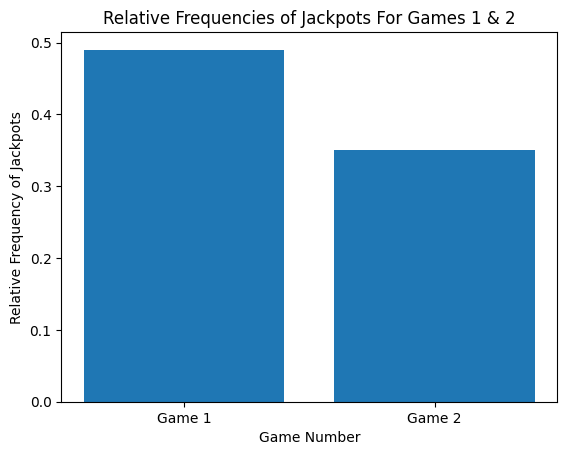

In [76]:
# organize data for plotting
xvals = ['Game 1', 'Game 2']
yvals = [game1_relfreq, game2_relfreq]

# create bar plot and format
plt.bar(xvals, yvals)
plt.title('Relative Frequencies of Jackpots For Games 1 & 2')
plt.xlabel('Game Number')
plt.ylabel('Relative Frequency of Jackpots')

# show plot
plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [80]:
# create three 6 sided die
d1 = Die(np.array([1,2,3,4,5,6]))
d2 = Die(np.array([1,2,3,4,5,6]))
d3 = Die(np.array([1,2,3,4,5,6]))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [86]:
# d1
# change face 6 weight to 5
d1.change_weights(6, 5)
print('d1')
print(d1.show_state())

d1
       weights
faces         
1          1.0
2          1.0
3          1.0
4          1.0
5          1.0
6          5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [98]:
# d3
# change face 1 weight to 5
d3.change_weights(1, 5)
print('d3')
print(d3.show_state())

d3
       weights
faces         
1          5.0
2          1.0
3          1.0
4          1.0
5          1.0
6          1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [104]:
# create fair die
d4 = Die(np.array([1,2,3,4,5,6]))

# create and play game with 5 copies of d4 10000 times
game3 = Game([d4,d4,d4,d4,d4])
game3.play_game(rolls=10000)
print(game3.show_results())

       1  2  3  4  5
roll                
1      1  1  3  4  4
2      6  2  3  3  1
3      1  1  5  3  2
4      1  3  4  3  4
5      1  4  2  4  3
...   .. .. .. .. ..
9996   4  3  5  2  1
9997   4  3  1  1  3
9998   4  4  2  2  5
9999   4  1  6  4  2
10000  5  2  3  5  5

[10000 rows x 5 columns]


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [105]:
# d4 = fair die
# d1 = unfair die from step 2
# d3 = unfair die from step 3

print(d4.weights)
print(d1.weights)
print(d3.weights)

[1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 5.]
[5. 1. 1. 1. 1. 1.]


In [106]:
game4 = Game([d1, d3, d4, d4, d4])
game4.play_game(rolls=10000)
print(game4.show_results())

       1  2  3  4  5
roll                
1      3  4  5  5  5
2      2  6  5  6  2
3      6  5  4  1  3
4      4  5  4  3  4
5      6  1  6  1  5
...   .. .. .. .. ..
9996   6  1  4  5  2
9997   2  2  5  6  6
9998   3  5  3  2  5
9999   2  3  3  3  4
10000  6  1  3  1  1

[10000 rows x 5 columns]


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [107]:
die_rolls = 10000

# game 3 analyzer - 5 fair dice
game3_analyzer = Analyzer(game3)
game3_jackpots = game3_analyzer.jackpot_counts()
game3_relfreq = game3_jackpots / die_rolls

# game 4 analyzer - 2 unfair 3 fair
game4_analyzer = Analyzer(game4)
game4_jackpots = game4_analyzer.jackpot_counts()
game4_relfreq = game4_jackpots / die_rolls

# print results
print(f"Jackpot Counts for Game 3: {game3_jackpots}")
print(f"Jackpot Counts for Game 4: {game4_jackpots}")
print('\n')
print(f"Relative Frequencies for Game 3: {game3_relfreq}")
print(f"Relative Frequencies for Game 4: {game4_relfreq}")

Jackpot Counts for Game 3: 8
Jackpot Counts for Game 4: 6


Relative Frequencies for Game 3: 0.0008
Relative Frequencies for Game 4: 0.0006


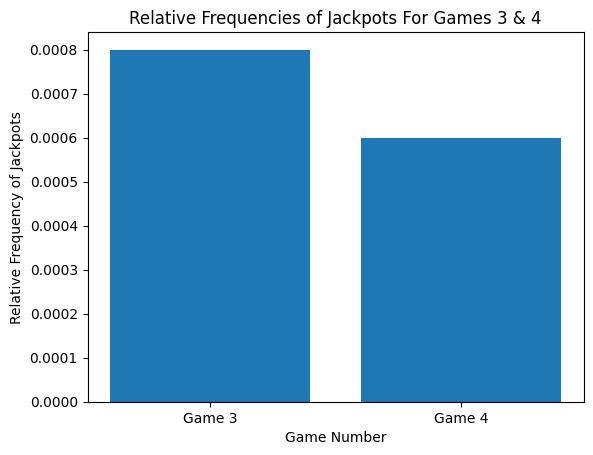

In [108]:
# plot relative frequencies for game 3 and 4

# organize data for plotting
die_xvals = ['Game 3', 'Game 4']
die_yvals = [game3_relfreq, game4_relfreq]

# create bar plot and format
plt.bar(die_xvals, die_yvals)
plt.title('Relative Frequencies of Jackpots For Games 3 & 4')
plt.xlabel('Game Number')
plt.ylabel('Relative Frequency of Jackpots')

# show plot
plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [121]:
df1 = pd.read_csv('english_letters.txt', delimiter=' ', header=None, names=['letter', 'weight'])
df1.set_index('letter', inplace=True)
df1.head()

,weight
letter,
E,529117365
T,390965105
A,374061888
O,326627740
I,320410057


In [143]:
# convert dataframe to dictionary
letters_dict = df1.to_dict()['weight']

# store letters as numpy array for die faces
letter_faces = np.array(list(letters_dict.keys()))

In [144]:
# create Die object with letters and update each weight as specified weight
letter_die = Die(letter_faces)

# loop through dictionary and for every face, get the associated weight and update the die
for key, value in letters_dict.items():
    letter_die.change_weights(key, value)

# confirm changes have been made
print(letter_die.show_state())

           weights
faces             
E      529117365.0
T      390965105.0
A      374061888.0
O      326627740.0
I      320410057.0
N      313720540.0
S      294300210.0
R      277000841.0
H      216768975.0
L      183996130.0
D      169330528.0
C      138416451.0
U      117295780.0
M      110504544.0
F       95422055.0
G       91258980.0
P       90376747.0
W       79843664.0
Y       75294515.0
B       70195826.0
V       46337161.0
K       35373464.0
J        9613410.0
X        8369915.0
Z        4975847.0
Q        4550166.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [147]:
# create game object with 4 of the letter_die
letter_game1 = Game([letter_die, letter_die, letter_die, letter_die])

# play game with 1000 rolls
letter_game1.play_game(rolls=1000)

# print results
print(letter_game1.show_results())

      1  2  3  4
roll            
1     H  N  E  H
2     E  E  R  N
3     E  E  E  I
4     H  J  T  S
5     W  I  E  R
...  .. .. .. ..
996   I  H  S  A
997   S  E  N  N
998   C  R  U  D
999   C  N  E  E
1000  G  A  R  T

[1000 rows x 4 columns]


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [153]:
# read in scrabble words as dataframe
scrabble_df = pd.read_csv('scrabble_words.txt', delimiter=' ', header=None, names=['words'])
scrabble_words = scrabble_df['words'].to_list()

In [171]:
# create letter game analyzer object
letter_game1_analyzer = Analyzer(letter_game1)

# get distinct permutations converted to list of words
letter_game1_permutations = letter_game1_analyzer.permutations()
distinct_perms = letter_game1_permutations.index.to_list()
distinct_perms = [''.join(x) for x in distinct_perms]

# check how many words in distinct permutations is in the scrabble word list
english_words = 0

for word in distinct_perms:
    if word in scrabble_words:
        english_words += 1

# print count of permutations in vocabulary words
english_words # 56 words from permutations were actual english words

56

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [146]:
# create another game object with 5 of the letter_die
letter_game2 = Game([letter_die, letter_die, letter_die, letter_die, letter_die])

# play game with 1000 rolls
letter_game2.play_game(rolls=1000)

# print results
print(letter_game2.show_results())

      1  2  3  4  5
roll               
1     R  S  B  N  A
2     R  N  E  F  E
3     O  M  Q  W  L
4     I  A  E  Y  U
5     O  N  O  D  M
...  .. .. .. .. ..
996   E  W  S  Y  A
997   I  I  R  D  I
998   R  R  N  L  S
999   A  D  A  T  I
1000  W  L  R  A  I

[1000 rows x 5 columns]


In [175]:
# create letter game analyzer object
letter_game2_analyzer = Analyzer(letter_game2)

# get distinct permutations converted to list of words
letter_game2_permutations = letter_game2_analyzer.permutations()
distinct_perms = letter_game2_permutations.index.to_list()
distinct_perms = [''.join(x) for x in distinct_perms]

# check how many words in distinct permutations is in the scrabble word list
english_words = 0

for word in distinct_perms:
    if word in scrabble_words:
        english_words += 1

# print count of permutations in vocabulary words
english_words # 3 words from permutations were actual english words

3

*For the game with 4 dice of letters, there were a total of 56 english words found in the permutations from 1000 rolls.*
*For the game with 5 dice of letters, there were a total of 3 english words found from the permutations of 1000 rolls.*

*The game with 4 dice produces more english letters than the game with 5 dice.*